## 7.5 CNN の実装

- Convolution の実装
    - im2col
- Pooling の実装
- CNN の実装

In [1]:
from collections import OrderedDict

import numpy as np
np.random.seed(7)
import matplotlib.pyplot as plt
import tqdm
from sklearn import datasets
from sklearn.model_selection import train_test_split

from network import trainer
from network import visualizer
from network import layers as L
from network import functions as F
from network.module import SequenceNet

In [2]:
# loading training data
load = datasets.load_digits
X, y = load(return_X_y=True)

# from sklearn.datasets import fetch_openml
# X, y = fetch_openml('mnist_784', return_X_y=True)

# flat to image
size = int(np.sqrt(X.shape[1]))
X = X.reshape(-1, 1, size, size)

# splitting
X_train, X_test, y_train, y_test = train_test_split(X, y.astype("int"), test_size=0.3)

feature_size = X_train.shape[1]
num_classes = int(np.max(y)) + 1
Y_train = np.eye(num_classes)[y_train]
Y_test = np.eye(num_classes)[y_test]

In [3]:
X_train.shape

(1257, 1, 8, 8)

In [4]:
Y_train.shape

(1257, 10)

## CNN の実装

In [5]:
# training parameters
num_epoch = 100
batch_size = 8
lr = 0.05
l1 = 0.0001
l2 = 0.0001

In [6]:
# network definition
sequence = [
    L.Convolution(n_in=1, n_out=8, filter_size=4),
    L.MaxPooling(pool_h=4, pool_w=4),
    L.ReLU(),
    L.Flatten(),
    L.BatchNormalization(n_out=32),
    L.Linear(n_in=32, n_out=num_classes),
]
net = SequenceNet(layers=sequence, loss=L.SoftmaxCrossEntropy(), l1=l1, l2=l2)

In [7]:
net.layers[0].params["w"].shape

(8, 1, 4, 4)

### 学習前のフィルタ

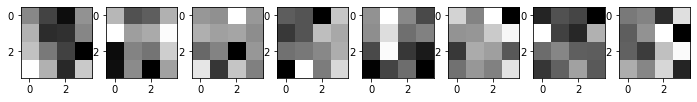

In [8]:
fig, axes = plt.subplots(1, 8, figsize=(12, 8))
for b, ax in enumerate(axes):
    ax.imshow(net.layers[0].params["w"][b, 0], cmap="gray")
fig.show()

完全にランダム．

### 訓練の実行

In [9]:
# train network
loss_train, acc_train, loss_test, acc_test, histories = trainer.train(
    net=net, X_train=X_train, Y_train=Y_train, X_test=X_test, Y_test=Y_test,
    num_epoch=num_epoch, batch_size=batch_size, learning_rate=lr
)

print(f"sum_weights_abs: {net.sum_weights_abs:.3f}")
print(f"sum_weights_pow2: {net.sum_weights_pow2:.3f}")

epoch    99: 100%|██████████| 100/100 [00:31<00:00,  3.20it/s, loss_train=0.0949, acc_train=0.987, loss_test=0.211, acc_test=0.952]

sum_weights_abs: 338.489
sum_weights_pow2: 398.175


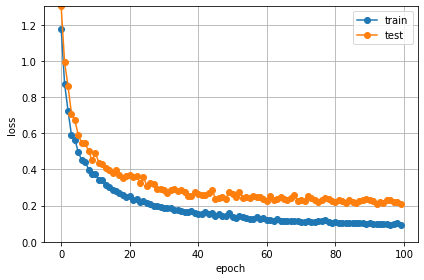

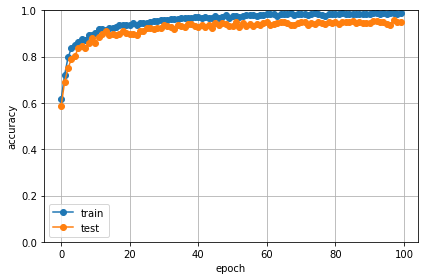

In [10]:
# visualize
visualizer.visualize_histories(histories)

### 学習後のフィルタ

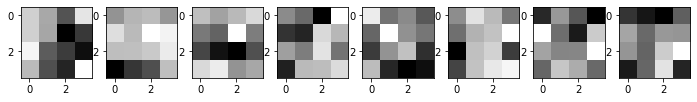

In [11]:
fig, axes = plt.subplots(1, 8, figsize=(12, 8))
for b, ax in enumerate(axes):
    ax.imshow(net.layers[0].params["w"][b, 0], cmap="gray")
fig.show()

最初よりは少しフィルタらしくなった...？

### 中間特徴量の可視化

#### 0

In [12]:
idx = 1

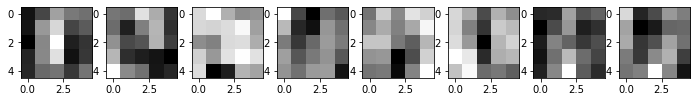

In [13]:
fig, axes = plt.subplots(1, 8, figsize=(12, 8))
for b, ax in enumerate(axes):
    ax.imshow(net.layers[1].x[idx, :].transpose(1, 2, 0)[:, :, b], cmap="gray")
fig.show()

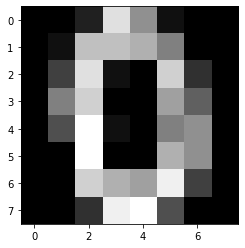

In [14]:
plt.imshow(net.layers[0].x[idx, :].transpose(1, 2, 0), cmap='gray')

#### 1

In [15]:
idx = 8

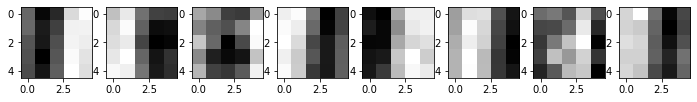

In [16]:
fig, axes = plt.subplots(1, 8, figsize=(12, 8))
for b, ax in enumerate(axes):
    ax.imshow(net.layers[1].x[idx, :].transpose(1, 2, 0)[:, :, b], cmap="gray")
fig.show()

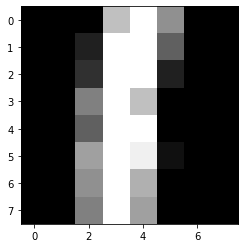

In [17]:
plt.imshow(net.layers[0].x[idx, :].transpose(1, 2, 0), cmap='gray')

#### 2

In [18]:
idx = 14

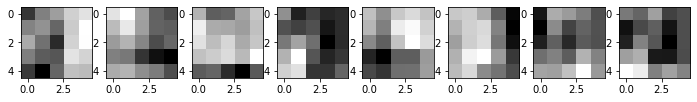

In [19]:
fig, axes = plt.subplots(1, 8, figsize=(12, 8))
for b, ax in enumerate(axes):
    ax.imshow(net.layers[1].x[idx, :].transpose(1, 2, 0)[:, :, b], cmap="gray")
fig.show()

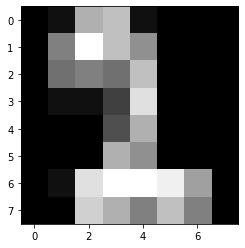

In [20]:
plt.imshow(net.layers[0].x[idx, :].transpose(1, 2, 0), cmap='gray')

#### 3

In [21]:
idx = 91

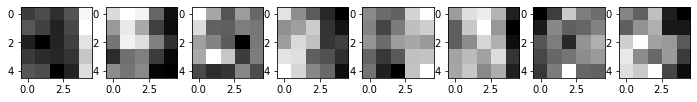

In [22]:
fig, axes = plt.subplots(1, 8, figsize=(12, 8))
for b, ax in enumerate(axes):
    ax.imshow(net.layers[1].x[idx, :].transpose(1, 2, 0)[:, :, b], cmap="gray")
fig.show()

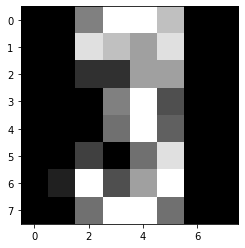

In [23]:
plt.imshow(net.layers[0].x[idx, :].transpose(1, 2, 0), cmap='gray')

#### 4

In [24]:
idx = 7

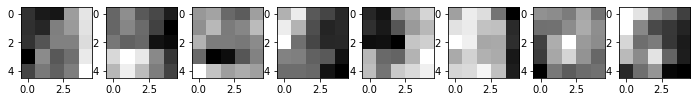

In [25]:
fig, axes = plt.subplots(1, 8, figsize=(12, 8))
for b, ax in enumerate(axes):
    ax.imshow(net.layers[1].x[idx, :].transpose(1, 2, 0)[:, :, b], cmap="gray")
fig.show()

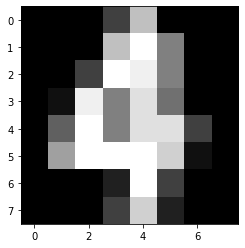

In [26]:
plt.imshow(net.layers[0].x[idx, :].transpose(1, 2, 0), cmap='gray')

#### 5

In [27]:
idx = 13

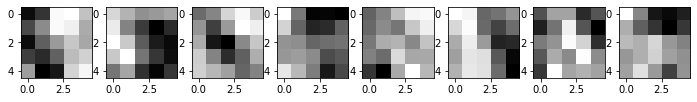

In [28]:
fig, axes = plt.subplots(1, 8, figsize=(12, 8))
for b, ax in enumerate(axes):
    ax.imshow(net.layers[1].x[idx, :].transpose(1, 2, 0)[:, :, b], cmap="gray")
fig.show()

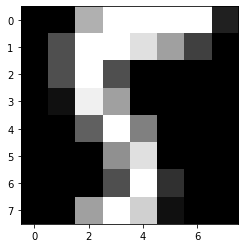

In [29]:
plt.imshow(net.layers[0].x[idx, :].transpose(1, 2, 0), cmap='gray')

#### 6

In [30]:
idx = 38

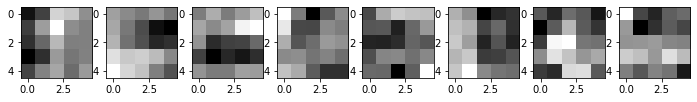

In [31]:
fig, axes = plt.subplots(1, 8, figsize=(12, 8))
for b, ax in enumerate(axes):
    ax.imshow(net.layers[1].x[idx, :].transpose(1, 2, 0)[:, :, b], cmap="gray")
fig.show()

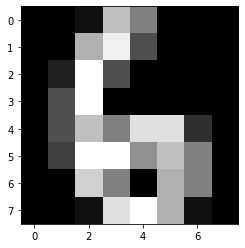

In [32]:
plt.imshow(net.layers[0].x[idx, :].transpose(1, 2, 0), cmap='gray')

#### 7

In [33]:
idx = 66

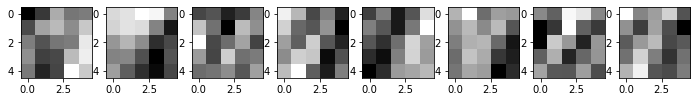

In [34]:
fig, axes = plt.subplots(1, 8, figsize=(12, 8))
for b, ax in enumerate(axes):
    ax.imshow(net.layers[1].x[idx, :].transpose(1, 2, 0)[:, :, b], cmap="gray")
fig.show()

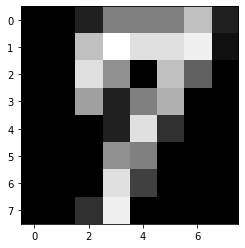

In [35]:
plt.imshow(net.layers[0].x[idx, :].transpose(1, 2, 0), cmap='gray')

#### 8

In [36]:
idx = 64

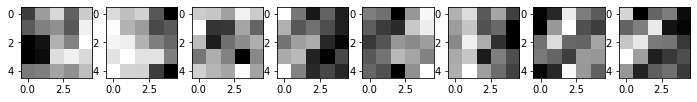

In [37]:
fig, axes = plt.subplots(1, 8, figsize=(12, 8))
for b, ax in enumerate(axes):
    ax.imshow(net.layers[1].x[idx, :].transpose(1, 2, 0)[:, :, b], cmap="gray")
fig.show()

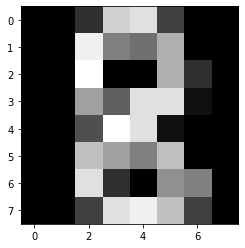

In [38]:
plt.imshow(net.layers[0].x[idx, :].transpose(1, 2, 0), cmap='gray')

#### 9

In [39]:
idx = 53

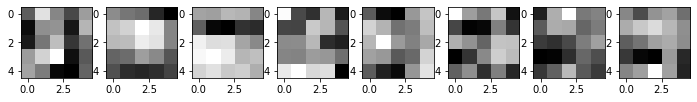

In [40]:
fig, axes = plt.subplots(1, 8, figsize=(12, 8))
for b, ax in enumerate(axes):
    ax.imshow(net.layers[1].x[idx, :].transpose(1, 2, 0)[:, :, b], cmap="gray")
fig.show()

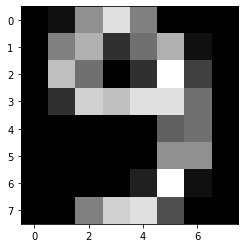

In [41]:
plt.imshow(net.layers[0].x[idx, :].transpose(1, 2, 0), cmap='gray')

### 特徴量クイズ

全結合層になったつもりで，可視化された特徴量から数字を当ててみましょう！

In [42]:
idx = 0

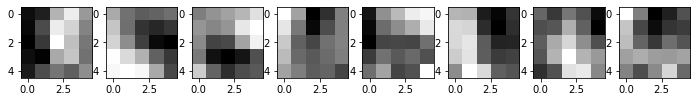

In [43]:
fig, axes = plt.subplots(1, 8, figsize=(12, 8))
for b, ax in enumerate(axes):
    ax.imshow(net.layers[1].x[idx, :].transpose(1, 2, 0)[:, :, b], cmap="gray")
fig.show()

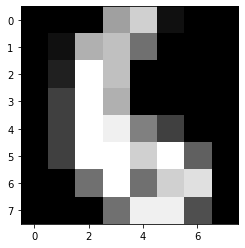

In [44]:
plt.imshow(net.layers[0].x[idx, :].transpose(1, 2, 0), cmap='gray')